In [ ]:
# pip install NeuralForecast

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# X_df = pd.read_csv('/content/drive/MyDrive/AML/weather/M/df_x.csv')
# Y_df = pd.read_csv('/content/drive/MyDrive/AML/weather/M/df_y.csv')


X_df = pd.read_csv('@datasets_reproducibity/weather/M/df_x.csv')
Y_df = pd.read_csv('@datasets_reproducibity/weather/M/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2020-01-01 00:10:00,-0.5,-0.166667,-0.5,-0.5
1,2020-01-01 00:20:00,-0.5,-0.166667,-0.5,-0.5
2,2020-01-01 00:30:00,-0.5,-0.166667,-0.5,-0.5
3,2020-01-01 00:40:00,-0.5,-0.166667,-0.5,-0.5
4,2020-01-01 00:50:00,-0.5,-0.166667,-0.5,-0.5
...,...,...,...,...,...
52690,2020-12-31 23:20:00,0.5,0.000000,0.5,0.5
52691,2020-12-31 23:30:00,0.5,0.000000,0.5,0.5
52692,2020-12-31 23:40:00,0.5,0.000000,0.5,0.5
52693,2020-12-31 23:50:00,0.5,0.000000,0.5,0.5


In [ ]:
a=Y_df['unique_id'].unique()
a.size

21

In [ ]:
merged_df = pd.merge(Y_df, X_df[['ds', 'ex_1', 'ex_2','ex_3','ex_4']], on='ds', how='left')
merged_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2020-01-01 00:10:00,p (mbar),2.114257,-0.5,-0.166667,-0.5,-0.5
1,2020-01-01 00:10:00,T (degC),-1.459980,-0.5,-0.166667,-0.5,-0.5
2,2020-01-01 00:10:00,Tpot (K),-1.607935,-0.5,-0.166667,-0.5,-0.5
3,2020-01-01 00:10:00,Tdew (degC),-1.052596,-0.5,-0.166667,-0.5,-0.5
4,2020-01-01 00:10:00,rh (%),0.990128,-0.5,-0.166667,-0.5,-0.5
...,...,...,...,...,...,...,...
1106590,2021-01-01 00:00:00,SWDR (W/m�),-0.672767,-0.5,0.166667,-0.5,-0.5
1106591,2021-01-01 00:00:00,PAR (�mol/m�/s),-0.679493,-0.5,0.166667,-0.5,-0.5
1106592,2021-01-01 00:00:00,max. PAR (�mol/m�/s),-0.588296,-0.5,0.166667,-0.5,-0.5
1106593,2021-01-01 00:00:00,Tlog (degC),-1.169683,-0.5,0.166667,-0.5,-0.5


In [ ]:
filtered_df = merged_df[merged_df['unique_id'] == 'OT']
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.drop("ds",axis=1,inplace=True)
# filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])
filtered_df['ds'] = range(len(filtered_df))

Y_df=filtered_df
Y_df

/tmp/ipykernel_35879/2816410556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop("ds",axis=1,inplace=True)
/tmp/ipykernel_35879/2816410556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = range(len(filtered_df))


,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.044395,-0.5,-0.166667,-0.5,-0.5,0
1,OT,0.044134,-0.5,-0.166667,-0.5,-0.5,1
2,OT,0.043092,-0.5,-0.166667,-0.5,-0.5,2
3,OT,0.049343,-0.5,-0.166667,-0.5,-0.5,3
4,OT,0.055073,-0.5,-0.166667,-0.5,-0.5,4
...,...,...,...,...,...,...,...
52690,OT,0.057157,0.5,0.000000,0.5,0.5,52690
52691,OT,0.074346,0.5,0.000000,0.5,0.5,52691
52692,OT,0.062886,0.5,0.000000,0.5,0.5,52692
52693,OT,0.059501,0.5,0.000000,0.5,0.5,52693


In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.044395,-0.5,-0.166667,-0.5,-0.5,0
1,OT,0.044134,-0.5,-0.166667,-0.5,-0.5,1
2,OT,0.043092,-0.5,-0.166667,-0.5,-0.5,2
3,OT,0.049343,-0.5,-0.166667,-0.5,-0.5,3
4,OT,0.055073,-0.5,-0.166667,-0.5,-0.5,4
...,...,...,...,...,...,...,...
52690,OT,0.057157,0.5,0.000000,0.5,0.5,52690
52691,OT,0.074346,0.5,0.000000,0.5,0.5,52691
52692,OT,0.062886,0.5,0.000000,0.5,0.5,52692
52693,OT,0.059501,0.5,0.000000,0.5,0.5,52693


In [ ]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.044395,-0.5,-0.166667,-0.5,-0.5,0
1,OT,0.044134,-0.5,-0.166667,-0.5,-0.5,1
2,OT,0.043092,-0.5,-0.166667,-0.5,-0.5,2
3,OT,0.049343,-0.5,-0.166667,-0.5,-0.5,3
4,OT,0.055073,-0.5,-0.166667,-0.5,-0.5,4
...,...,...,...,...,...,...,...
52690,OT,0.057157,0.5,0.000000,0.5,0.5,52690
52691,OT,0.074346,0.5,0.000000,0.5,0.5,52691
52692,OT,0.062886,0.5,0.000000,0.5,0.5,52692
52693,OT,0.059501,0.5,0.000000,0.5,0.5,52693


## Horizon = 96

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.044395,-0.5,-0.166667,-0.5,-0.5,0
1,OT,0.044134,-0.5,-0.166667,-0.5,-0.5,1
2,OT,0.043092,-0.5,-0.166667,-0.5,-0.5,2
3,OT,0.049343,-0.5,-0.166667,-0.5,-0.5,3
4,OT,0.055073,-0.5,-0.166667,-0.5,-0.5,4
...,...,...,...,...,...,...,...
52690,OT,0.057157,0.5,0.000000,0.5,0.5,52690
52691,OT,0.074346,0.5,0.000000,0.5,0.5,52691
52692,OT,0.062886,0.5,0.000000,0.5,0.5,52692
52693,OT,0.059501,0.5,0.000000,0.5,0.5,52693


In [ ]:
Y_train_df = Y_df.iloc[:52599,:]
Y_test_df = Y_df.iloc[52599:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.048562,-0.152174,0.000000,0.5,0.5,52599
1,OT,0.048822,-0.152174,0.000000,0.5,0.5,52600
2,OT,0.052469,-0.152174,0.000000,0.5,0.5,52601
3,OT,0.055333,-0.152174,0.000000,0.5,0.5,52602
4,OT,0.052469,-0.152174,0.000000,0.5,0.5,52603
...,...,...,...,...,...,...,...
91,OT,0.057157,0.500000,0.000000,0.5,0.5,52690
92,OT,0.074346,0.500000,0.000000,0.5,0.5,52691
93,OT,0.062886,0.500000,0.000000,0.5,0.5,52692
94,OT,0.059501,0.500000,0.000000,0.5,0.5,52693


In [ ]:
model = Autoformer(h=96,
                 input_size=24,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=150,
                   )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(
    models=[model],
    freq=1
)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 148 K 
7 | decoder       | Decoder       | 141 K 
------------------------------------------------
290 K     Trainable params
0         Non-trainable params
290 K     Total params
1.162     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=150` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Autoformer
unique_id,,
OT,0,0.031733
OT,1,0.027095
OT,2,0.031114
OT,3,0.035097
OT,4,0.042424
...,...,...
OT,91,0.054400
OT,92,0.054595
OT,93,0.055022


<Axes: xlabel='ds'>

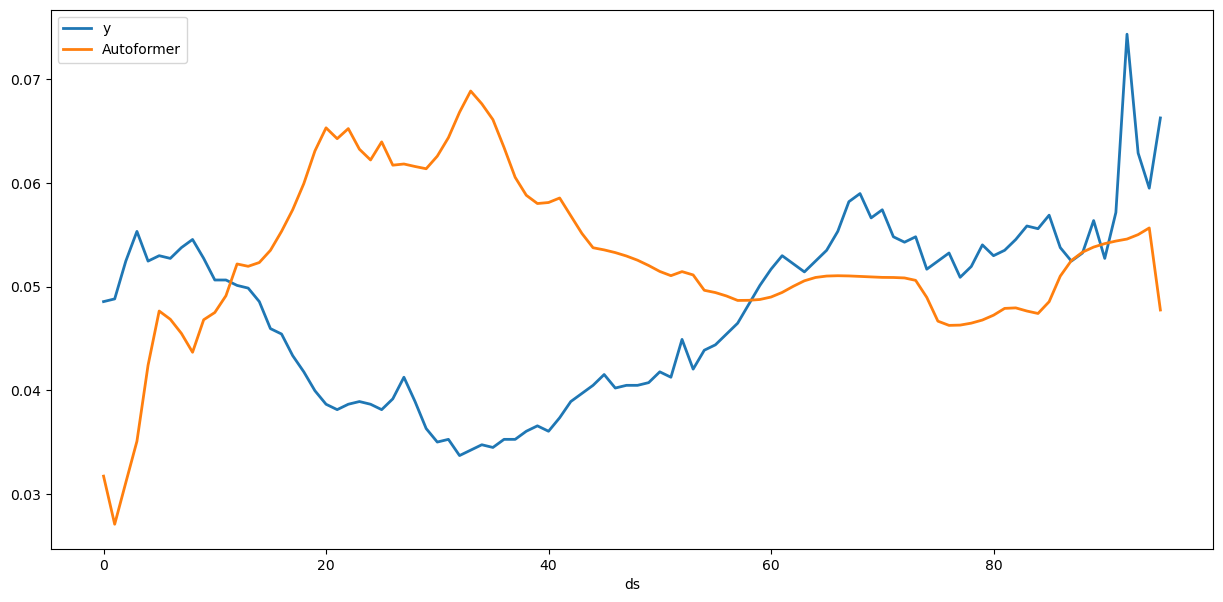

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.4f}')
print(f'Autoformer MSE: {mse_autoformer:.4f}')

Autoformer MAE: 0.0119
Autoformer MSE: 0.0002


## Horizon = 192

In [ ]:
Y_df

In [ ]:
Y_train_df = Y_df.iloc[:52503,:]
Y_test_df = Y_df.iloc[52503:,:]
Y_test_df

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

In [ ]:
from neuralforecast.losses.numpy import mae,mse
model = Autoformer(h=192,
                 input_size=24,
                #  hidden_size = 16,
                #  conv_hidden_size = 32,
                #  n_head=2,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=1,
                #  val_check_steps=50,
                #  early_stop_patience_steps=2
                   )

In [ ]:
nf = NeuralForecast(
    models=[model],
    freq='H'
)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

## Horizon 336

In [ ]:
Y_df

In [ ]:
Y_train_df = Y_df.iloc[:52359,:]
Y_test_df = Y_df.iloc[52359:,:]
Y_test_df

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

In [ ]:
from neuralforecast.losses.numpy import mae,mse
model = Autoformer(h=336,
                 input_size=24,
                #  hidden_size = 16,
                #  conv_hidden_size = 32,
                #  n_head=2,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=1,
                #  val_check_steps=50,
                #  early_stop_patience_steps=2
                   )

In [ ]:
nf = NeuralForecast(
    models=[model],
    freq='H'
)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

## Horizon 720

In [ ]:
Y_df

In [ ]:
Y_train_df = Y_df.iloc[:51975,:]
Y_test_df = Y_df.iloc[51975:,:]
Y_test_df

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

In [ ]:
from neuralforecast.losses.numpy import mae,mse
model = Autoformer(h=720,
                 input_size=24,
                #  hidden_size = 16,
                #  conv_hidden_size = 32,
                #  n_head=2,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=1,
                #  val_check_steps=50,
                #  early_stop_patience_steps=2
                   )

In [ ]:
nf = NeuralForecast(
    models=[model],
    freq='H'
)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')